In [ ]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

#here the csv file has been copied into three lists to allow better availability
data=pd.read_csv('/content/Sales.csv')



In [ ]:
data = pd.read_csv('/content/Sales.csv')

In [ ]:
data.head()

,Product Name,Past Seven Day Sales,Day of the Week,Date Input 1,Date Input 2,Date Input 3,Season,Festival,Sales Previous Year
0,Smartphone,350,Monday,19-04-2024,19-04-2024,Apr-19,Spring,No,320
1,Laptop,420,Tuesday,20-04-2024,20-04-2024,Apr-20,Spring,No,400
2,Tablet,380,Wednesday,21-04-2024,21-04-2024,Apr-21,Spring,Yes,360
3,Smartwatch,410,Thursday,22-04-2024,22-04-2024,Apr-22,Spring,No,380
4,Headphones,480,Friday,23-04-2024,23-04-2024,Apr-23,Spring,No,450


In [ ]:
data.columns

Index(['Product Name', 'Past Seven Day Sales', 'Day of the Week',
       'Date Input 1', 'Date Input 2', 'Date Input 3', 'Season', 'Festival',
       'Sales Previous Year'],
      dtype='object')

In [ ]:
data.shape

(2858, 9)

In [ ]:
data = data.drop("Product Name",axis=1)

In [ ]:
print(data.duplicated().to_string())

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2858 entries, 0 to 2857
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Past Seven Day Sales  2858 non-null   int64 
 1   Day of the Week       2858 non-null   object
 2   Date Input 1          2858 non-null   object
 3   Date Input 2          2858 non-null   object
 4   Date Input 3          2858 non-null   object
 5   Season                2858 non-null   object
 6   Festival              2858 non-null   object
 7   Sales Previous Year   2858 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 178.8+ KB


In [ ]:
data.describe()

,Past Seven Day Sales,Sales Previous Year
count,2858.000000,2858.000000
mean,104.996501,39.893982
std,55.814264,44.663573
min,33.000000,6.000000
25%,68.000000,27.000000
50%,99.000000,35.000000
75%,127.000000,43.000000
max,560.000000,540.000000


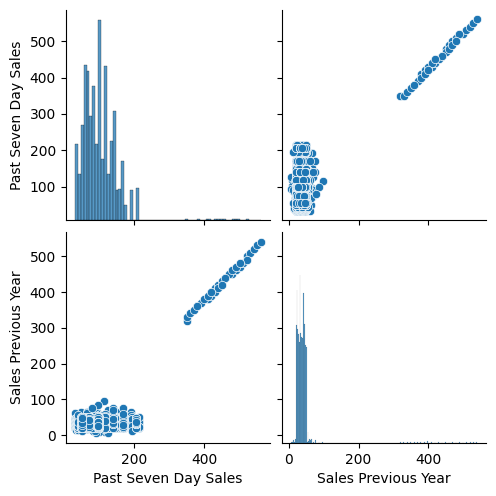

In [ ]:
sns.pairplot(data)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('/content/Sales.csv')


In [ ]:
data


,Product Name,Past Seven Day Sales,Day of the Week,Date Input 1,Date Input 2,Date Input 3,Season,Festival,Sales Previous Year
0,Smartphone,350,Monday,19-04-2024,19-04-2024,Apr-19,Spring,No,320
1,Laptop,420,Tuesday,20-04-2024,20-04-2024,Apr-20,Spring,No,400
2,Tablet,380,Wednesday,21-04-2024,21-04-2024,Apr-21,Spring,Yes,360
3,Smartwatch,410,Thursday,22-04-2024,22-04-2024,Apr-22,Spring,No,380
4,Headphones,480,Friday,23-04-2024,23-04-2024,Apr-23,Spring,No,450
...,...,...,...,...,...,...,...,...,...
2853,Ships,54,Friday,12-02-2004 00:00,12-02-2004 00:00,12-02-2004 00:00,Spring,No,20
2854,Ships,54,Saturday,1/31/2005 0:00,1/31/2005 0:00,1/31/2005 0:00,Spring,No,29
2855,Ships,54,Sunday,03-01-2005 00:00,03-01-2005 00:00,03-01-2005 00:00,Spring,No,43
2856,Ships,54,Monday,3/28/2005 0:00,3/28/2005 0:00,3/28/2005 0:00,Spring,Yes,34


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('/content/Sales.csv')

# Remove leading and trailing spaces in categorical columns
data['Day of the Week'] = data['Day of the Week'].str.strip()
data['Season'] = data['Season'].str.strip()
data['Festival'] = data['Festival'].str.strip()

# Select relevant features
features = ['Past Seven Day Sales', 'Day of the Week', 'Season', 'Festival', 'Sales Previous Year']
X = data[features]
y = data['Past Seven Day Sales']

# Encode categorical features
day_encoder = OneHotEncoder(categories=[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']],
                            handle_unknown='ignore')
season_encoder = OneHotEncoder(categories=[['Spring', 'Summer', 'Autumn', 'Winter']], handle_unknown='ignore')
festival_encoder = OneHotEncoder(categories=[['No', 'Yes']], handle_unknown='ignore')

ct = ColumnTransformer(transformers=[('day_encoder', day_encoder, ['Day of the Week']),
                                     ('season_encoder', season_encoder, ['Season']),
                                     ('festival_encoder', festival_encoder, ['Festival'])],
                                     remainder='passthrough')

X_encoded = ct.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Example of predicting sales for new data
new_data = pd.DataFrame({
    'Past Seven Day Sales': [500],
    'Day of the Week': ['Saturday'],
    'Season': ['Spring'],
    'Festival': ['Christmas'],
    'Sales Previous Year': [1000]
})

# Remove leading and trailing spaces in new data
new_data['Day of the Week'] = new_data['Day of the Week'].str.strip()
new_data['Season'] = new_data['Season'].str.strip()
new_data['Festival'] = new_data['Festival'].str.strip()

# Encode new data
new_data_encoded = ct.transform(new_data)

new_prediction = model.predict(new_data_encoded)
print("Predicted Sales for New Data:", new_prediction[0])


Mean Squared Error: 4.41320786137629e-28
Predicted Sales for New Data: 500.0000000000003


In [ ]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [-9.55321299e-15  1.88737914e-15 -1.22124533e-15  9.15933995e-16
  2.47024623e-15  1.49186219e-15  3.92047506e-15 -2.71050543e-20
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.24119465e-15
 -1.24726618e-15  1.00000000e+00  4.44089210e-16]
Intercept: 1.4210854715202004e-14


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate R-squared
r_squared = r2_score(y_test, predictions)
print("R-squared:", r_squared)


Mean Squared Error: 4.41320786137629e-28
R-squared: 1.0


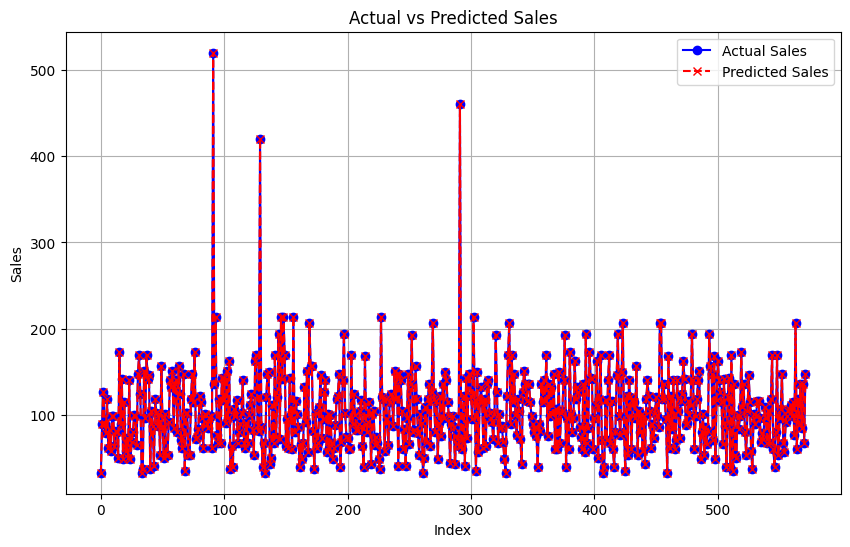

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Sales', color='blue', marker='o')
plt.plot(predictions, label='Predicted Sales', color='red', linestyle='--', marker='x')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming you have already split your data into training and testing sets (X_train, X_test, y_train, y_test)

# Create the decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = clf.predict(X_train)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)

# Optionally, make predictions on the testing set
test_predictions = clf.predict(X_test)

# Calculate accuracy on the testing set
test_accuracy = accuracy_score(y_test, test_predictions)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 1.0
Testing Accuracy: 0.9982517482517482
